In [1]:
# %matplotlib
# %matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/home/Seanebum/.local/lib/python3.5/site-packages', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/home/Seanebum/.local/lib/python3.5/site-packages/IPython/extensions', '/home/Seanebum/.ipython', '/mnt/c/Users/seanm/OneDrive/Documents/Research/TauHybridSolver/GillesPy2']


In [3]:
import math
import gillespy2
from gillespy2.basic_tau_leaping_solver import BasicTauLeapingSolver
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.basic_ode_solver import BasicODESolver

In [4]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [5]:
model = MichaelisMenten()


In [6]:
%time results = model.run(solver=BasicTauLeapingSolver(), show_labels=True)
# import cProfile

# cProfile.run('model.run(solver=BasicTauLeapingSolver(), show_labels=True)', sort='tot')

CPU times: user 312 ms, sys: 31.2 ms, total: 344 ms
Wall time: 316 ms


In [7]:
%time results2 = model.run(solver=BasicSSASolver(), show_labels=True)

CPU times: user 250 ms, sys: 0 ns, total: 250 ms
Wall time: 242 ms


In [8]:
results3 = model.run(solver=BasicODESolver(), show_labels=True)

In [9]:
# cProfile.run('model.run(solver=BasicSSASolver(), show_labels=True, debug=False)', sort='tot')
# %time results2 = model.run(solver=BasicSSASolver(), show_labels=True, profile=True, debug=False)

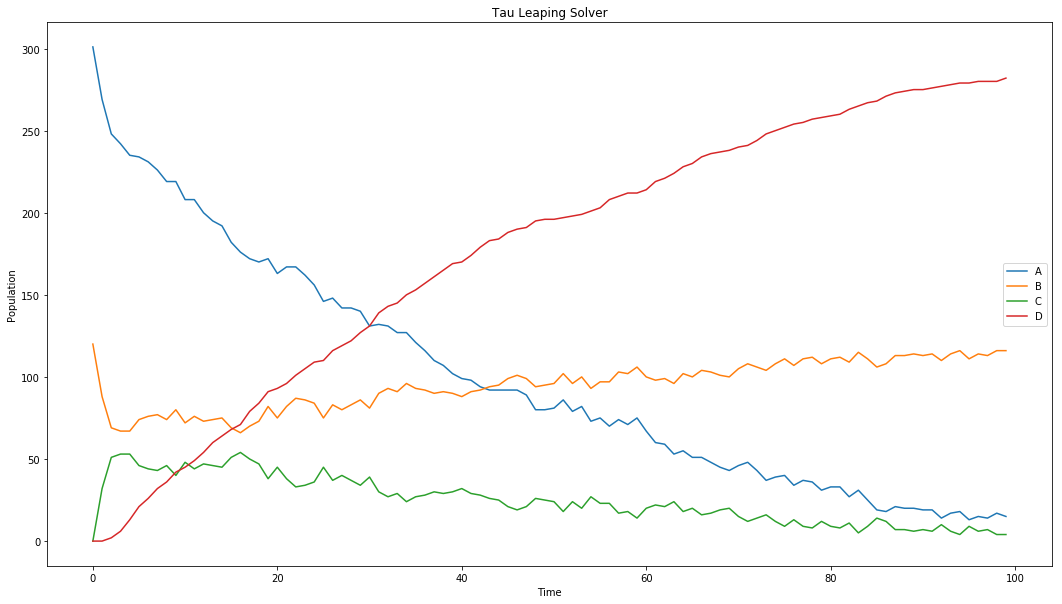

In [10]:
plt.figure(figsize=(18,10))
plt.title("Tau Leaping Solver")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results['time'], results['A'], label='A')
plt.plot(results['time'], results['B'], label='B')
plt.plot(results['time'], results['C'], label='C')
plt.plot(results['time'], results['D'], label='D')
plt.legend(loc='best')


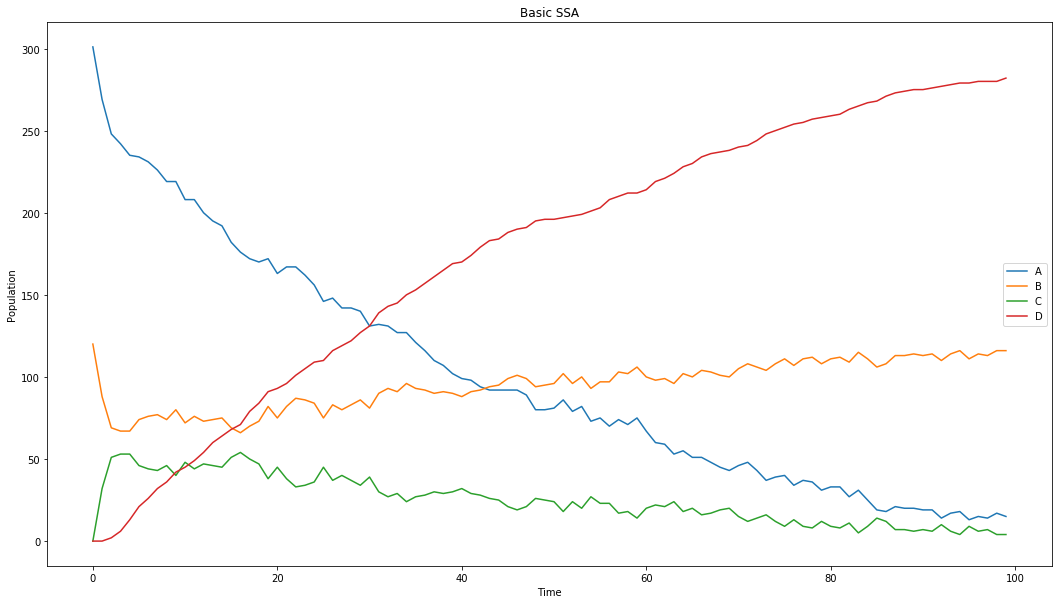

In [11]:
plt.figure(figsize=(18,10))
plt.title("Basic SSA")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results2['time'], results['A'], label='A')
plt.plot(results2['time'], results['B'], label='B')
plt.plot(results2['time'], results['C'], label='C')
plt.plot(results2['time'], results['D'], label='D')
plt.legend(loc='best')

In [24]:
results3[:, 0]

TypeError: list indices must be integers or slices, not tuple

In [13]:
total_difference = {}
for i in results:
    total_difference[i] = [x - y for x,y in zip(results['A'], results2['A'])]

In [14]:
print(total_difference)

{'time': [0, -2, -2, 6, 2, 3, 10, 8, -3, 0, -9, -2, -3, -2, -5, -15, -8, -13, -16, -1, -5, 7, 5, -2, -8, -10, -12, -14, -2, -4, -9, -8, -8, -17, -15, -21, -23, -34, -31, -25, -26, -28, -26, -31, -24, -22, -17, -16, -28, -23, -17, -16, -19, -12, -21, -21, -28, -17, -12, -12, -18, -24, -15, -24, -20, -25, -20, -24, -25, -29, -27, -23, -30, -34, -35, -25, -32, -26, -21, -30, -22, -23, -26, -24, -34, -36, -36, -27, -27, -22, -29, -29, -36, -28, -24, -29, -27, -31, -23, -27], 'A': [0, -2, -2, 6, 2, 3, 10, 8, -3, 0, -9, -2, -3, -2, -5, -15, -8, -13, -16, -1, -5, 7, 5, -2, -8, -10, -12, -14, -2, -4, -9, -8, -8, -17, -15, -21, -23, -34, -31, -25, -26, -28, -26, -31, -24, -22, -17, -16, -28, -23, -17, -16, -19, -12, -21, -21, -28, -17, -12, -12, -18, -24, -15, -24, -20, -25, -20, -24, -25, -29, -27, -23, -30, -34, -35, -25, -32, -26, -21, -30, -22, -23, -26, -24, -34, -36, -36, -27, -27, -22, -29, -29, -36, -28, -24, -29, -27, -31, -23, -27], 'D': [0, -2, -2, 6, 2, 3, 10, 8, -3, 0, -9, -2, -3, 

In [15]:
total_sum = 0
total_len = 0
for i in total_difference:
    total_sum += sum(total_difference[i])
    total_len += len(total_difference[i])

In [16]:
average_diff = abs(total_sum / total_len)
print("Average population difference between Tau and SSA simulations: ", average_diff)

Average population difference between Tau and SSA simulations:  17.71


TODO: Use 'screen' to run simulations (ctrl+a - cmd mode, ctrl+d - initialize screen, -r - disconnect screen)

Make sure to run simulations using all 3 solvers (tau, tau-hybrid, and ssa) over increasing values of V

In [17]:
from scipy import stats

In [18]:
    results = model.run(solver=BasicTauLeapingSolver(), show_labels=True)
    results2 = model.run(solver=BasicSSASolver(), show_labels=True)

In [19]:
stats.ks_2samp(results['A'], results2['A'])

Ks_2sampResult(statistic=0.12, pvalue=0.4431254026988257)

In [20]:
stats.ks_2samp(results['B'], results2['B'])

Ks_2sampResult(statistic=0.12, pvalue=0.4431254026988257)

In [21]:
stats.ks_2samp(results['C'], results2['C'])

Ks_2sampResult(statistic=0.12, pvalue=0.4431254026988257)

In [22]:
stats.ks_2samp(results['D'], results2['D'])

Ks_2sampResult(statistic=0.10000000000000003, pvalue=0.6766201497002454)

In [23]:
stats.ks_2samp(results['time'], results2['time'])

Ks_2sampResult(statistic=0.0, pvalue=1.0)